In [1]:
import sys
sys.path.insert(0, '../../wildlife-tools')
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import pandas as pd
# import torchvision.transforms as T
import timm

from wildlife_datasets import datasets,  splits
from wildlife_tools.data import WildlifeDataset
from wildlife_tools.features import DeepFeatures
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.inference import KnnClassifier

import os
sys.path.append('..')
import pandas as pd
from wildlife_datasets import datasets
from wildlife_datasets.analysis import display_statistics, plot_bbox_segmentation, plot_grid
from wildlife_datasets.splits import visualize_split
from wildlife_datasets.splits import TimeCutoffSplit, TimeProportionSplit


In [2]:
# qwe = 0
# for d_name in datasets.names_all:
#     try:
#         # print(d_name.__name__, int(d_name.metadata['reported_n_individuals']))
#         # d_name.metadata
#         qwe += d_name.metadata['reported_n_individuals']
#         # print(qwe)
#     except:
#         # print("yes")

#         pass
# qwe

In [3]:
# dataset_attributes = dir(dataset)
# print(dataset_attributes)

In [4]:
# num_classes = dataset.num_classes
# num_classes

In [5]:
#Loading the dataset

names = [
    datasets.LionData,
    datasets.SealIDSegmented,
    datasets.SeaStarReID2023,
    datasets.StripeSpotter,
    datasets.CTai,
    datasets.CZoo,
    datasets.NyalaData
]

In [6]:
l = [
 'datasets.LionData',
 'datasets.SealIDSegmented',
 'datasets.SeaStarReID2023',
 'datasets.StripeSpotter',
 'datasets.CTai',
 'datasets.CZoo',
 'datasets.NyalaData']

In [7]:
roots = ['data/' + str(dataset).split('.')[1] for dataset in l]
roots

['data/LionData',
 'data/SealIDSegmented',
 'data/SeaStarReID2023',
 'data/StripeSpotter',
 'data/CTai',
 'data/CZoo',
 'data/NyalaData']

data/NyalaData


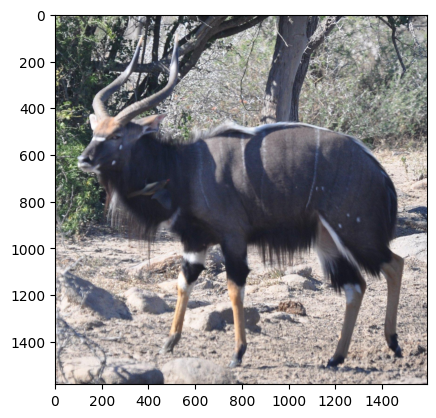

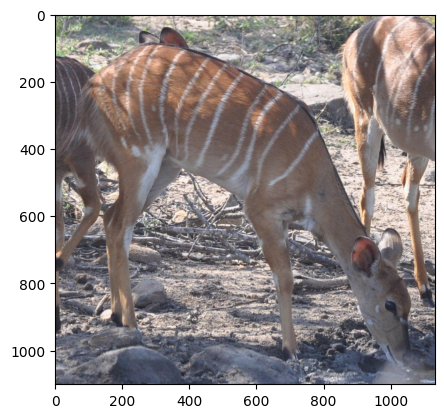

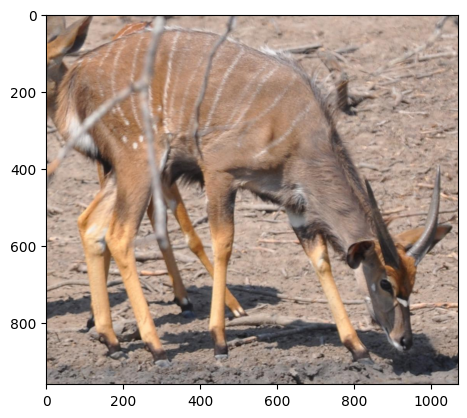

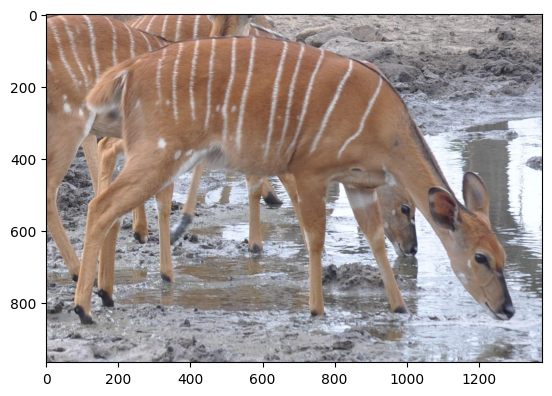

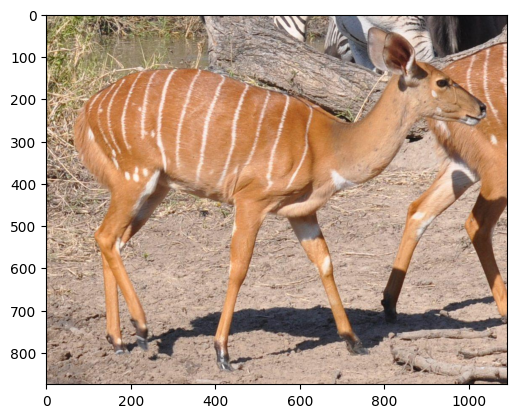

In [8]:
root = roots[6]
print(root)
m = names[6](root)
print(m)
df = m.df
plot_bbox_segmentation(df, root, 5)

In [9]:
df

image_id  identity  \
0     0059ff52cecc36e9        19   
1     005d8127c517bb4f        10   
2     008704ae8100e69a        57   
3     0093921f040a08f1       149   
4     00b507f86cb33078        58   
...                ...       ...   
1937  ff23ad7bf130a5e8        27   
1938  ff3ea932c8a937ac        21   
1939  ff5b29e291c08b04        57   
1940  ffcd28a7d1110b93         8   
1941  fffa9044d6e026ab       177   

                                                   path orientation  \
0     wildlife_reidentification-main\Nyala_Data_Zero...        left   
1     wildlife_reidentification-main\Nyala_Data_Zero...       right   
2     wildlife_reidentification-main\Nyala_Data_Zero...       right   
3     wildlife_reidentification-main\Nyala_Data_Zero...       right   
4     wildlife_reidentification-main\Nyala_Data_Zero...       right   
...                                                 ...         ...   
1937  wildlife_reidentification-main\Nyala_Data_Zero...        left   
1938  wildlife_reidentification-main\Nyala_Data_Zero...       right   
1939  wildlife_reidentification-main\Nyala_Data_Zero...       right   
1940  wildlife_reidentification-main\Nyala_Data_Zero...       right   
1941  wildlife_reidentification-main\Nyala_Data_Zero...       right   

     original_split  
0              test  
1              test  
2              test  
3             train  
4              test  
...             ...  
1937           test  
1938           test  
1939           test  
1940           test  
1941          train  

[1942 rows x 5 columns]

Number of identitites            237
Number of all animals            1942
Number of animals with one image 1
Number of unidentified animals   0


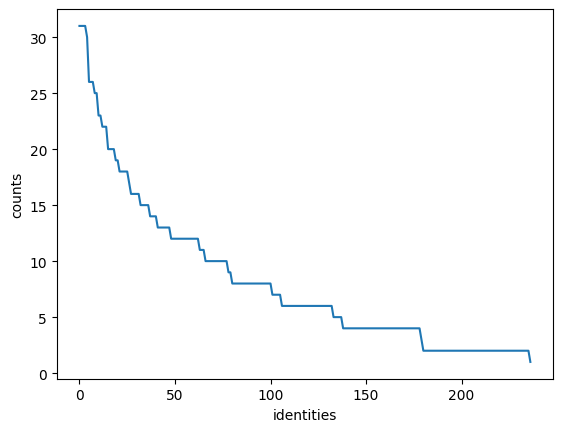

In [10]:
display_statistics(df)

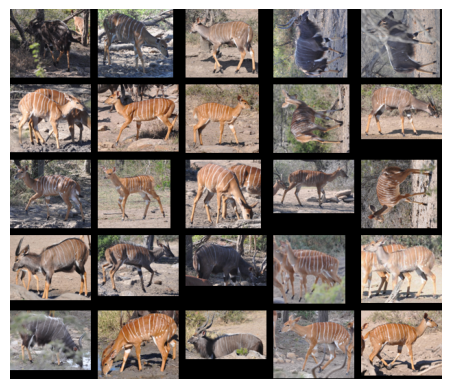

In [11]:
m.plot_grid(n_cols=5);

In [12]:
print(df.columns)

Index(['image_id', 'identity', 'path', 'orientation', 'original_split'], dtype='object')


In [13]:
unique_categories = df['identity'].unique()
print(unique_categories)

[ 19  10  57 149  58 102 147 202 114 100 111  33  21  65  32  36  30 131
  68  85  45  88  67 242  46 145 143 166  23  37 209  51  89  69 274 181
  50 223  47   7 150 153  40  94 252 230 239  11 169 113 140  60 240 106
  13  42   8  71   6 127  27 196 175 162 179 193  48  54  49 172 225  93
  14 104  43   3  80 212 227 170  81  34 144  98  53   1  64 250 134  12
 246 107   5  20 109 115  95 151 129 164  63 270 213  74  55  41 204 189
 116  87   4  26 269 187 234  75 118  82  84 137 268 228 110 205 156 233
  18 132  76 124  31 267 245  62  24 165  25 177 160 155 157 273 229  56
  77 218  97  92 260 123  52 226  70 197 122  28 108  15 176 101 146 186
 247  17 125  22 217 178 241  90   9 191 158 161  44 126 199  91 141 120
 194 119  79 198 174 182 210 183 188 190 184 243 272 121 139  72  86  16
  96 148 231 142 185 167 105  61  38 211  29 237 112 130 200 251 168 152
 232 135 180 173 215 220  83  35 128 207 201 221 136 203   2 206  39 117
 219 154  73]


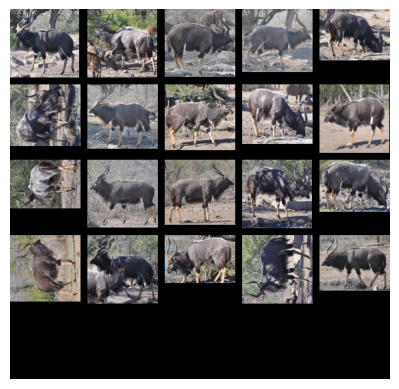

In [14]:
m.plot_grid(n_cols=5, idx=df['identity']==19);

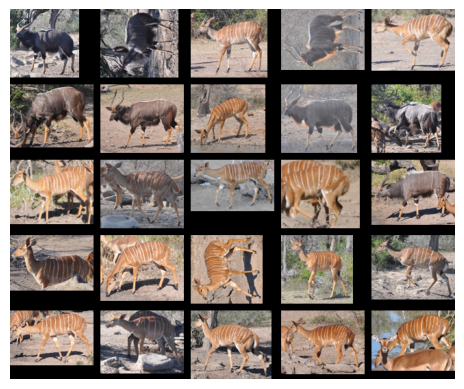

In [15]:
m.plot_grid(n_cols=5, idx=df['orientation']=='left');

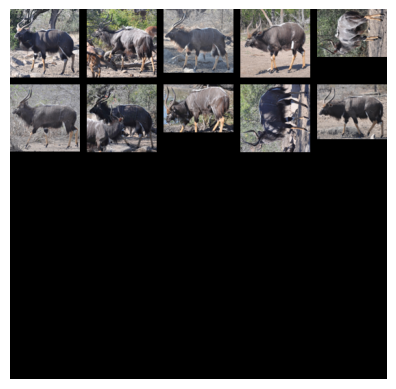

In [16]:
m.plot_grid(n_cols=5, idx=(df['orientation']=='left')*(df['identity']==19));

In [17]:
print(m)

In [18]:
df

image_id  identity  \
0     0059ff52cecc36e9        19   
1     005d8127c517bb4f        10   
2     008704ae8100e69a        57   
3     0093921f040a08f1       149   
4     00b507f86cb33078        58   
...                ...       ...   
1937  ff23ad7bf130a5e8        27   
1938  ff3ea932c8a937ac        21   
1939  ff5b29e291c08b04        57   
1940  ffcd28a7d1110b93         8   
1941  fffa9044d6e026ab       177   

                                                   path orientation  \
0     wildlife_reidentification-main\Nyala_Data_Zero...        left   
1     wildlife_reidentification-main\Nyala_Data_Zero...       right   
2     wildlife_reidentification-main\Nyala_Data_Zero...       right   
3     wildlife_reidentification-main\Nyala_Data_Zero...       right   
4     wildlife_reidentification-main\Nyala_Data_Zero...       right   
...                                                 ...         ...   
1937  wildlife_reidentification-main\Nyala_Data_Zero...        left   
1938  wildlife_reidentification-main\Nyala_Data_Zero...       right   
1939  wildlife_reidentification-main\Nyala_Data_Zero...       right   
1940  wildlife_reidentification-main\Nyala_Data_Zero...       right   
1941  wildlife_reidentification-main\Nyala_Data_Zero...       right   

     original_split  
0              test  
1              test  
2              test  
3             train  
4              test  
...             ...  
1937           test  
1938           test  
1939           test  
1940           test  
1941          train  

[1942 rows x 5 columns]

In [19]:
df['path'][0]

'wildlife_reidentification-main\\Nyala_Data_Zero\\test\\19\\844_leftphoto.jpg'

In [20]:
dataset_path_prefix = 'D:\\Classroom\\Project\\p1\\wildlife-datasets\\data\\NyalaData\\'
df['path'] = df['path'].apply(lambda x: os.path.join(dataset_path_prefix, x))

df['path'][0]

'D:\\Classroom\\Project\\p1\\wildlife-datasets\\data\\NyalaData\\wildlife_reidentification-main\\Nyala_Data_Zero\\test\\19\\844_leftphoto.jpg'

Number of images: 1942
Number of unique labels: 237


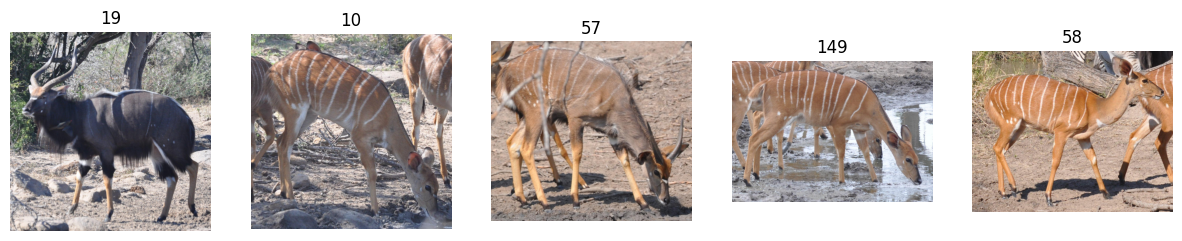

In [21]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Load images and labels
def load_images_from_dataframe(dataframe):
    images = []
    labels = []
    for index, row in dataframe.iterrows():
        file_path = row['path']
        image = cv2.imread(file_path)
        if image is not None:
            images.append(image)
            labels.append(row['identity'])
    return images, labels

images, labels = load_images_from_dataframe(df)

# Print the count of images and unique labels
print(f"Number of images: {len(images)}")
print(f"Number of unique labels: {len(set(labels))}")

# Plot a sample of images with their corresponding labels
num_samples = min(5, len(images))
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i in range(num_samples):
    axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i].set_title(labels[i])
    axes[i].axis('off')
plt.show()


In [22]:
query_images = images[:100]
database_images = images[100:]
query_labels = labels[:100]
database_labels = labels[100:]

In [23]:
def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

In [24]:
# Initialize list to store descriptors
database_descriptors = []

# Extract features from database images
for image in database_images:
    keypoints, descriptors = extract_sift_features(image)
    if descriptors is not None:
        database_descriptors.extend(descriptors)

# Convert the database descriptors to a numpy array
database_features = np.array(database_descriptors)

# Reshape the database features to ensure consistency
num_descriptors_per_image = len(descriptors)
database_features = database_features.reshape(-1, num_descriptors_per_image)

# Initialize FLANN parameters
flann_params = dict(algorithm=1, trees=5)  # algorithm=1 for FLANN_INDEX_KDTREE, trees=5 for number of trees

# Create FLANN object
flann = cv2.FlannBasedMatcher(flann_params, {})

# Initialize variables for accuracy calculation
total_queries = len(query_images)
correct_predictions = 0

# Extract features from query images
for query_image, query_label in zip(query_images, query_labels):
    query_keypoints, query_descriptors = extract_sift_features(query_image)
    
    if query_descriptors is None:
        continue
    
    # Match query descriptors with database descriptors using FLANN
    matches = flann.knnMatch(query_descriptors, database_features, k=2)
    
    # Apply ratio test and count good matches
    good_matches = []
    for match_pair in matches:
        if len(match_pair) < 2:
            continue
        m, n = match_pair
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)
    
    # Calculate similarity score
    similarity_score = len(good_matches)
    
    # Check if similarity score meets threshold and update correct predictions
    if similarity_score > 0:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_queries
print("Accuracy:", accuracy)


KeyboardInterrupt: 